In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train data:', 'images', X_img_train.shape,
     ' labels:', y_label_train.shape)
print('test data:', 'images', X_img_test.shape,
     ' labels:', y_label_test.shape)

train data: images (50000, 32, 32, 3)  labels: (50000, 1)
test data: images (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_onehot = np_utils.to_categorical(y_label_train)
y_label_test_onehot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3),
                input_shape=(32,32,3),
                activation='relu',
                padding='same'))

In [9]:
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32, kernel_size=(3,3),
                activation='relu',
                padding='same'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3),
                activation='relu', padding='same'))

In [12]:
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64, kernel_size=(3,3),
                activation='relu', padding='same'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3,3),
                activation='relu', padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3),
                activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(rate=0.3))

In [15]:
model.add(Dense(2500,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(rate=0.3))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [18]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(X_img_train_normalize, y_label_train_onehot,
                         validation_split=0.2,
                         epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 1.7802 - acc: 0.3358 - val_loss: 1.6197 - val_acc: 0.3715
Epoch 2/10
 - 13s - loss: 1.3595 - acc: 0.5039 - val_loss: 1.3018 - val_acc: 0.5306
Epoch 3/10
 - 13s - loss: 1.1727 - acc: 0.5790 - val_loss: 1.0414 - val_acc: 0.6311
Epoch 4/10
 - 13s - loss: 1.0217 - acc: 0.6345 - val_loss: 0.9541 - val_acc: 0.6748
Epoch 5/10
 - 13s - loss: 0.9238 - acc: 0.6719 - val_loss: 0.8636 - val_acc: 0.6980
Epoch 6/10
 - 13s - loss: 0.8391 - acc: 0.7038 - val_loss: 0.7874 - val_acc: 0.7287
Epoch 7/10
 - 13s - loss: 0.7818 - acc: 0.7239 - val_loss: 0.7555 - val_acc: 0.7387
Epoch 8/10
 - 13s - loss: 0.7250 - acc: 0.7421 - val_loss: 0.7453 - val_acc: 0.7400
Epoch 9/10
 - 13s - loss: 0.6822 - acc: 0.7591 - val_loss: 0.6985 - val_acc: 0.7596
Epoch 10/10
 - 13s - loss: 0.6335 - acc: 0.7767 - val_loss: 0.6772 - val_acc: 0.7660


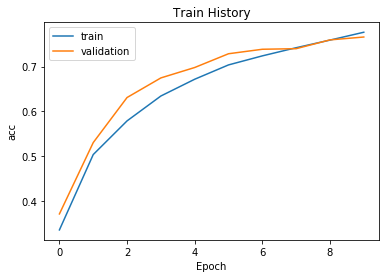

In [20]:
from def_function import show_train_history 
show_train_history(train_history,'acc', 'val_acc')

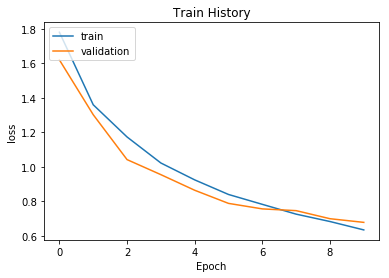

In [21]:
from def_function import show_train_history
show_train_history(train_history, 'loss', 'val_loss')

In [22]:
scores = model.evaluate(X_img_test_normalize,
                       y_label_test_onehot, verbose=0)
scores[1]

0.765

In [23]:
prediction = model.predict_classes(X_img_test_normalize)

In [24]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 4, 3, 9], dtype=int64)

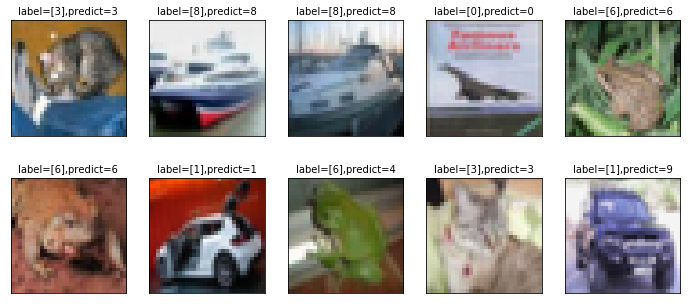

In [25]:
from def_function import plot_images_labels_prediction
plot_images_labels_prediction(X_img_test, y_label_test, prediction,0,10)

In [26]:
Predicted_Probability = model.predict(X_img_test_normalize)

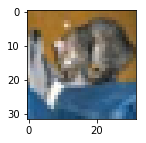

airplaneProbability:0.000058429
automobileProbability:0.000042282
birdProbability:0.000278961
catProbability:0.814499915
deerProbability:0.000388477
dogProbability:0.169680938
frogProbability:0.014060886
horseProbability:0.000127504
shipProbability:0.000817639
truckProbability:0.000045052


In [27]:
from def_function import show_Predicted_Probability
show_Predicted_Probability(y_label_test, prediction, X_img_test, Predicted_Probability, 0)

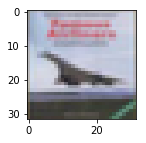

airplaneProbability:0.638240814
automobileProbability:0.001452973
birdProbability:0.020400679
catProbability:0.000819229
deerProbability:0.001950200
dogProbability:0.000123574
frogProbability:0.000058146
horseProbability:0.000100592
shipProbability:0.336260557
truckProbability:0.000593277


In [28]:
show_Predicted_Probability(y_label_test, prediction, X_img_test, Predicted_Probability, 3)

In [29]:
prediction.shape

(10000,)

In [30]:
y_label_test.shape

(10000, 1)

In [31]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [32]:
import pandas as pd
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,769,8,50,11,14,4,11,7,110,16
1,16,885,4,5,2,5,5,1,22,55
2,56,2,698,36,92,29,54,20,12,1
3,28,6,79,517,73,170,79,25,12,11
4,20,2,57,28,778,22,34,51,5,3
5,11,2,54,138,62,644,27,54,6,2
6,4,1,43,27,53,20,840,3,8,1
7,10,2,36,33,72,26,5,806,2,8
8,46,11,13,11,10,4,7,4,885,9
